# Exploring Salary Trends using PySpark
This project delves into an extensive analysis of salary trends and industry insights within the job market using PySpark, renowned for its efficiency in handling large datasets. The primary objective is to uncover patterns and fluctuations in salary levels across different industries and sectors.

## Notebook Breakdown
Importing Required Resources
Essential resources are imported to support the analysis. Since the installation of resources has been completed in the preceding data processing notebook, we proceed directly to importing them.

- Data Loading and Visualization
The preprocessed data, stored as "processed_salary_data.csv" in the file directory, is loaded using PySpark. Employing PySpark DataFrame operations, an initial overview of the data is obtained to ensure data quality and completeness.

- Salary Analysis
  - Salary Distribution: Descriptive statistics are computed to understand the distribution of salary levels within each industry. Histograms and box plots are employed to visualize the spread and central tendency of salary data.

  - Salary by Job: PySpark is utilized to calculate and visualize the average salary levels across different job roles. This analysis provides insights into salary disparities between various positions.

  - Salary by Industry: PySpark is utilized to calculate and visualize the average salary levels across different industries. This analysis provides insights into salary disparities between various industry sectors.

  - Salary by Country: PySpark is utilized to calculate and visualize the average salary levels across different countries. This analysis provides insights into salary disparities between various regions.

Through this PySpark-based analysis, the project aims to provide stakeholders with valuable insights into salary trends, industry performance, and sector dynamics, facilitating informed decision-making and strategic planning for organizational growth and development.

### Importing Required Resources 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import findspark
from pyspark.sql.functions import col, when

findspark.init()

from pyspark.sql import SparkSession 
spark = SparkSession.builder.appName('Name').config('config_option', 'value').getOrCreate()

import warnings

warnings.filterwarnings("ignore")

### Data Loading and Visualization

In [4]:
df = spark.read.option('inferSchema', True).csv('processed_job_descriptions.csv', header=True)
df.limit(3).toPandas()

,Qualifications,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Job Title,...,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Min Salary,Max Salary,Min Exp,Max Exp
0,M.Tech,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Digital Marketing Specialist,...,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"""{""""Sector"""":""""Diversified""""",59000,99000,5,15
1,BCA,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Web Developer,...,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"""{""""Sector"""":""""Financial Services""""",56000,116000,2,12
2,PhD,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,Operations Manager,...,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"""{""""Sector"""":""""Insurance""""",61000,104000,0,12


In [4]:
df.printSchema()

root
 |-- Qualifications: string (nullable = true)
 |-- location: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- Work Type: string (nullable = true)
 |-- Company Size: integer (nullable = true)
 |-- Job Posting Date: date (nullable = true)
 |-- Preference: string (nullable = true)
 |-- Job Title: string (nullable = true)
 |-- Role: string (nullable = true)
 |-- Job Portal: string (nullable = true)
 |-- Job Description: string (nullable = true)
 |-- Benefits: string (nullable = true)
 |-- skills: string (nullable = true)
 |-- Responsibilities: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Company Profile: string (nullable = true)
 |-- Min Salary: integer (nullable = true)
 |-- Max Salary: integer (nullable = true)
 |-- Min Exp: integer (nullable = true)
 |-- Max Exp: integer (nullable = true)



### Minimum Salary Distribution

In [5]:
df.select('Min Salary').summary().show()

+-------+------------------+
|summary|        Min Salary|
+-------+------------------+
|  count|           1615940|
|   mean|60003.433914625544|
| stddev| 3163.964273393827|
|    min|             55000|
|    25%|             57000|
|    50%|             60000|
|    75%|             63000|
|    max|             65000|
+-------+------------------+



The summary statistics reveal that the dataset comprises a substantial volume of observations, totaling 1,615,940 records for minimum salaries. On average, the minimum salary stands at approximately 60,003.43, with a moderate degree of variability around this mean, as indicated by a standard deviation of approximately 3,163.96. The range of minimum salaries spans from 55,000 to 65,000, showcasing the diversity in salary levels present in the dataset. Further insights from quartile analysis highlight that a significant portion of observations fall within the range of $57,000 to 63,000, indicating the spread of minimum salary values across various percentiles. These statistics offer valuable insights into the distribution and characteristics of minimum salaries, aiding in informed decision-making regarding compensation strategies and talent management initiatives.

### Maximum Salary Distribution

In [6]:
df.select('Max Salary').summary().show()

+-------+------------------+
|summary|        Max Salary|
+-------+------------------+
|  count|           1615940|
|   mean|104978.87545329654|
| stddev|14717.494468338378|
|    min|             80000|
|    25%|             92000|
|    50%|            105000|
|    75%|            118000|
|    max|            130000|
+-------+------------------+



The summary statistics for maximum salaries reveal insights into the distribution and characteristics of salary levels within the dataset. With a total count of 1,615,940 observations, the dataset encompasses a significant volume of maximum salary records. On average, the maximum salary is approximately 104,978.88, with a considerable degree of variability around this mean, as evidenced by a standard deviation of approximately 14,717.49. The range of maximum salaries extends from 80,000 to 130,000, showcasing the diversity in salary levels present in the dataset. Quartile analysis further illustrates the spread of maximum salary values, with a significant portion of observations falling within the range of $92,000 to 118,000 across various percentiles. These statistics offer valuable insights for organizations and stakeholders to understand the distribution and characteristics of maximum salary levels, aiding in strategic decision-making related to compensation planning and talent acquisition strategies.

### Jobs with Highest Average Salary

+--------------------+-----------------+----------+----------+
|           Job Title|   Average Salary|Min Salary|Max Salary|
+--------------------+-----------------+----------+----------+
|Financial Controller|82720.31295700498|     55000|    130000|
|    IT Administrator|82714.61449942463|     55000|    130000|
|    Process Engineer|82638.78875270368|     55000|    130000|
|       Data Engineer|82630.23322500478|     55000|    130000|
|Pharmaceutical Sa...| 82601.1004784689|     55000|    130000|
|Customer Service ...|82600.82108077143|     55000|    130000|
|Network Administr...|82597.06501336671|     55000|    130000|
|  Operations Manager|82591.01018797532|     55000|    130000|
|         Art Teacher|82586.93808312129|     55000|    130000|
|       Legal Advisor|82581.92358867136|     55000|    130000|
|           Paralegal|82580.57595117764|     55000|    130000|
|  Investment Analyst| 82573.4075978292|     55000|    130000|
|     Sales Associate|82571.36703044227|     55000|    

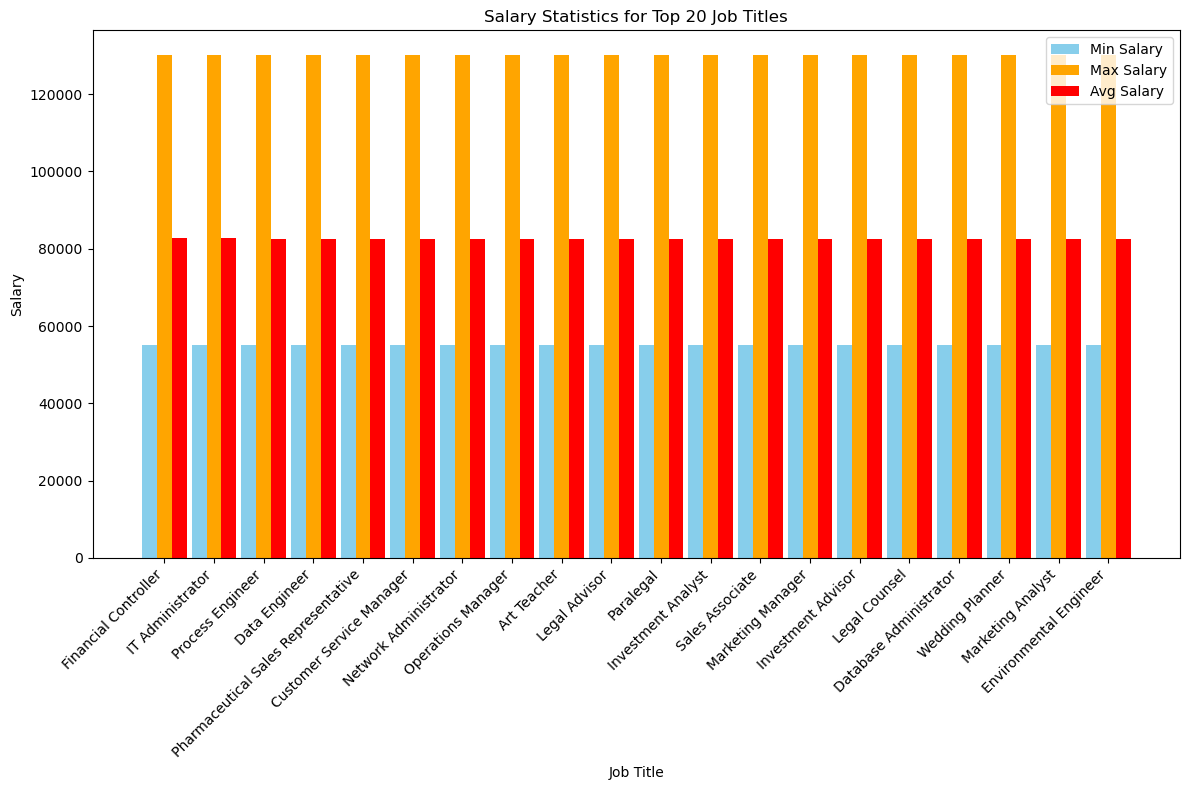

In [7]:
from pyspark.sql.functions import avg, col, min as min_, max as max_

# Calculate the average, minimum, and maximum salary for each job title
job_title_salary_stats = df.withColumn("Average Salary", (col("Min Salary") + col("Max Salary")) / 2) \
    .groupBy("Job Title") \
    .agg(
        avg("Average Salary").alias("Average Salary"),
        min_("Min Salary").alias("Min Salary"),
        max_("Max Salary").alias("Max Salary")
    )

# Get the top 20 job titles based on average salary
top_20_job_titles = job_title_salary_stats.orderBy(col("Average Salary").desc()).limit(20)

top_20_job_titles.show()

# Convert the DataFrame to Pandas for plotting
top_20_job_titles_pd = top_20_job_titles.toPandas()

# Extract data for plotting
job_titles = top_20_job_titles_pd["Job Title"]
min_salaries = top_20_job_titles_pd["Min Salary"]
max_salaries = top_20_job_titles_pd["Max Salary"]
avg_salaries = top_20_job_titles_pd["Average Salary"]

# Set the width of the bars
bar_width = 0.3

# Set the x locations for the groups
index = np.arange(len(job_titles))

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(index, min_salaries, bar_width, color='skyblue', label='Min Salary')
plt.bar(index + bar_width, max_salaries, bar_width, color='orange', label='Max Salary')
plt.bar(index + 2*bar_width, avg_salaries, bar_width, color='red', label='Avg Salary')

# Add labels and title
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Salary Statistics for Top 20 Job Titles')
plt.xticks(index + bar_width, job_titles, rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.savefig('job_highest_salary.png')
plt.show()

The dataset reveals a consistent salary pattern across a diverse spectrum of job titles, with an highest average salary range of approximately $82,500 to $82,720 for top 20 cases. Noteworthy roles such as Financial Controller, IT Administrator, and Process Engineer exhibit higher average salaries, indicating their significance and potential demand in the job market. Spanning various industries including finance, technology, education, and marketing, the dataset highlights the uniformity in compensation distribution, suggesting a level of market equilibrium. These insights are valuable for employers in setting competitive compensation packages and for job seekers in understanding salary expectations within their respective fields, ultimately aiding in informed decision-making processes regarding employment and talent acquisition strategies.

### Jobs with Lowest Average Salary

+--------------------+-----------------+----------+----------+
|           Job Title|   Average Salary|Min Salary|Max Salary|
+--------------------+-----------------+----------+----------+
|          IT Manager|82256.83869148337|     55000|    130000|
|       HR Generalist|82290.55793991416|     55000|    130000|
|Customer Service ...|82357.05137327452|     55000|    130000|
|Social Media Coor...|82363.91392846758|     55000|    130000|
|  Front-End Engineer|82368.33192209991|     55000|    130000|
|       Sales Manager| 82372.8520687338|     55000|    130000|
|        Pediatrician|82376.43705463182|     55000|    130000|
|      Tax Consultant|82378.61299246398|     55000|    130000|
|      SEM Specialist|82382.49258160238|     55000|    130000|
|Email Marketing S...|82392.23431929859|     55000|    130000|
|Business Developm...|82396.84230918248|     55000|    130000|
|Human Resources M...|82398.18271119843|     55000|    130000|
|Market Research A...| 82398.6765128992|     55000|    

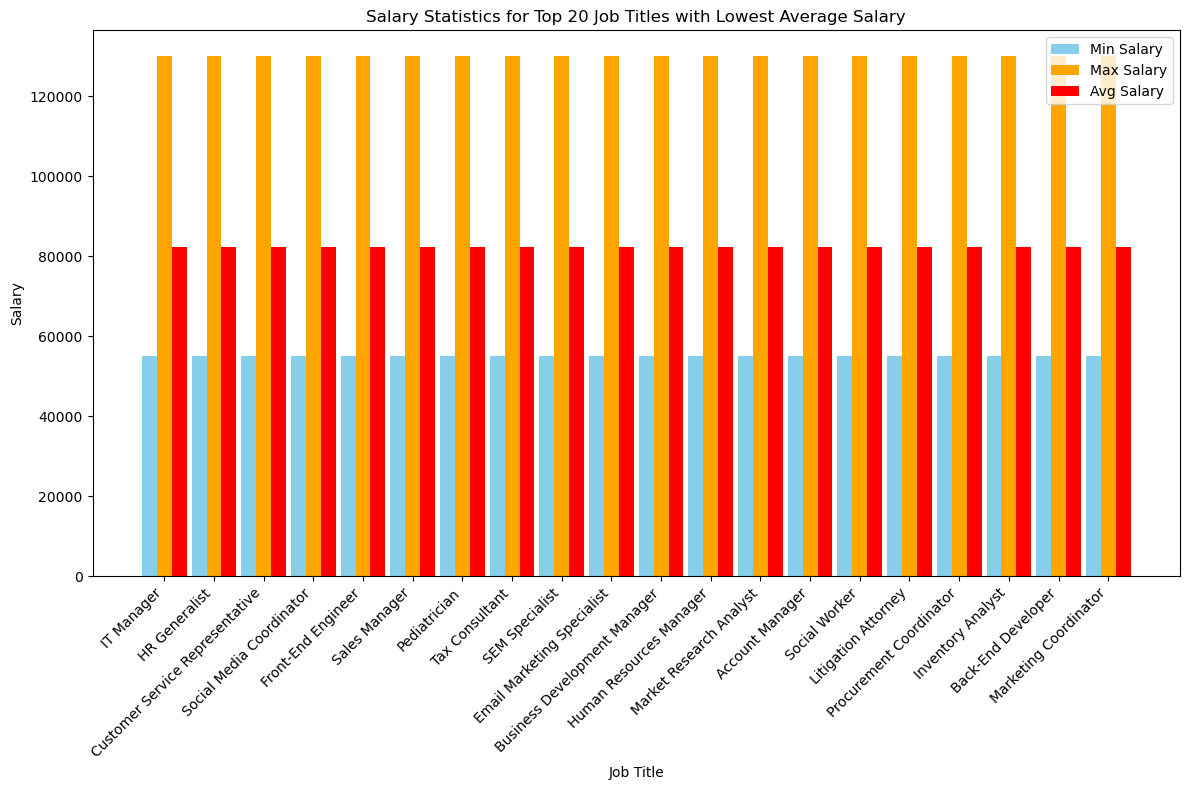

In [8]:
# Get the top 20 job titles based on average salary (ascending order)
top_20_job_titles_avg_salary = job_title_salary_stats.orderBy(col("Average Salary").asc()).limit(20)

top_20_job_titles_avg_salary.show()

# Convert the DataFrame to Pandas for plotting
top_20_job_titles_avg_salary_pd = top_20_job_titles_avg_salary.toPandas()

# Extract data for plotting
job_titles_avg_salary = top_20_job_titles_avg_salary_pd["Job Title"]
min_salaries_avg_salary = top_20_job_titles_avg_salary_pd["Min Salary"]
max_salaries_avg_salary = top_20_job_titles_avg_salary_pd["Max Salary"]
avg_salaries_avg_salary = top_20_job_titles_avg_salary_pd["Average Salary"]

# Set the width of the bars
bar_width = 0.3

# Set the x locations for the groups
index = np.arange(len(job_titles_avg_salary))

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(index, min_salaries_avg_salary, bar_width, color='skyblue', label='Min Salary')
plt.bar(index + bar_width, max_salaries_avg_salary, bar_width, color='orange', label='Max Salary')
plt.bar(index + 2*bar_width, avg_salaries_avg_salary, bar_width, color='red', label='Avg Salary')

# Add labels and title
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Salary Statistics for Top 20 Job Titles with Lowest Average Salary')
plt.xticks(index + bar_width, job_titles_avg_salary, rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


Despite their importance in various industries, roles such as IT Manager, HR Generalist, and Customer Service Representative are among those with lower average salaries. This suggests that these positions may face challenges in terms of compensation competitiveness compared to other roles in the dataset. However, it's important to note the diversity in job functions represented, spanning from technical roles like Front-End Engineer and Back-End Developer to specialized professions such as Pediatrician and Litigation Attorney. Despite the observed lower average salaries, these positions remain vital components of their respective fields. These insights offer valuable context for employers and job seekers, helping them understand compensation trends and make informed decisions regarding career paths and compensation strategies within their industries.

### Companies with Highest Average Salary

+--------------------+-----------------+----------+----------+
|             Company|   Average Salary|Min Salary|Max Salary|
+--------------------+-----------------+----------+----------+
|            Playtech| 83054.2570951586|     55000|    130000|
|     Leidos Holdings|83044.83695652174|     55000|    130000|
|Science Applicati...|82967.61363636363|     55000|    130000|
|        W.R. Berkley|82927.04918032787|     55000|    130000|
|   Avis Budget Group|     82916.015625|     55000|    130000|
|  Southwest Airlines|82895.33622559653|     55000|    130000|
|  Plains GP Holdings|82888.79408418658|     55000|    130000|
|  Jones Lang LaSalle| 82888.7665198238|     55000|    130000|
|     Muthoot Finance| 82887.0040253019|     55000|    130000|
|              Lennar|82869.49339207048|     55000|    130000|
|          Bajaj Auto|82865.83333333333|     55000|    130000|
|   Republic Services|82864.96149614961|     55000|    130000|
|     Sonoco Products|82863.06098964327|     55000|    

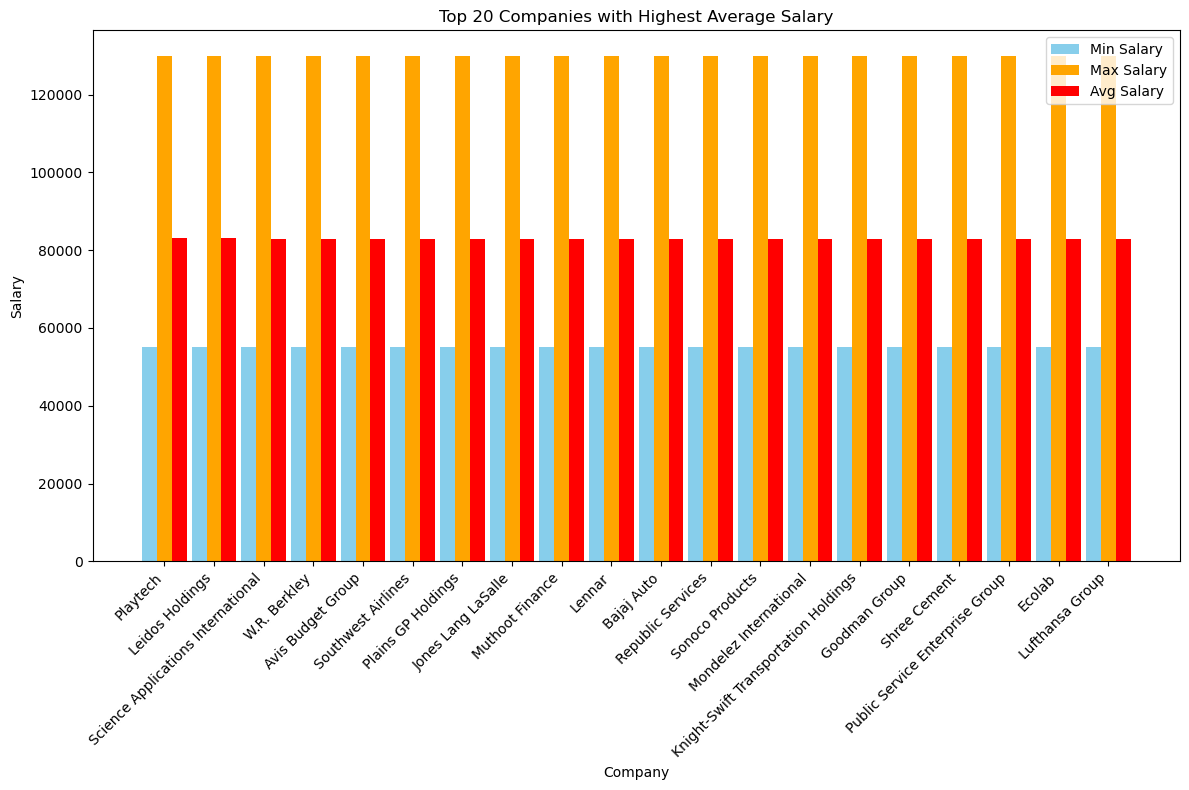

In [9]:
company_salary_stats = df.withColumn("Average Salary", (col("Min Salary") + col("Max Salary")) / 2) \
    .groupBy("Company") \
    .agg(
        avg("Average Salary").alias("Average Salary"),
        min_("Min Salary").alias("Min Salary"),
        max_("Max Salary").alias("Max Salary")
    )

# Get the top 20 companies based on average salary
top_20_companies = company_salary_stats.orderBy(col("Average Salary").desc()).limit(20)

top_20_companies.show()
# Convert the DataFrame to Pandas for plotting
top_20_companies_pd = top_20_companies.toPandas()

# Extract data for plotting
companies = top_20_companies_pd["Company"]
min_salaries = top_20_companies_pd["Min Salary"]
max_salaries = top_20_companies_pd["Max Salary"]
avg_salaries = top_20_companies_pd["Average Salary"]

# Set the width of the bars
bar_width = 0.3

# Set the x locations for the groups
index = np.arange(len(companies))

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(index, min_salaries, bar_width, color='skyblue', label='Min Salary')
plt.bar(index + bar_width, max_salaries, bar_width, color='orange', label='Max Salary')
plt.bar(index + 2*bar_width, avg_salaries, bar_width, color='red', label='Avg Salary')

# Add labels and title
plt.xlabel('Company')
plt.ylabel('Salary')
plt.title('Top 20 Companies with Highest Average Salary')
plt.xticks(index + bar_width, companies, rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.savefig('companies_highest_salary.png')
plt.show()


The dataset provides insights into companies providing the highest average salaries, with figures ranging from approximately $82,834 to $83,054 for top 20 companies. Leading the pack are companies like Playtech, Leidos Holdings, and Science Applications International Corporation (SAIC), which demonstrate a commitment to offering competitive compensation packages. Other notable companies such as W.R. Berkley, Avis Budget Group, and Southwest Airlines also stand out for their generous average salaries, indicating a strategic focus on attracting and retaining top talent across various industries. Representing sectors such as finance, transportation, manufacturing, and more, these companies underscore the universal recognition of the importance of competitive compensation in talent acquisition and retention strategies. These insights serve as valuable benchmarks for both job seekers seeking lucrative opportunities and employers striving to maintain competitiveness in the recruitment landscape. Understanding these trends enables strategic decision-making regarding talent management and recruitment practices within respective industries.

### Companies with Lowest Average Salary

+--------------------+-----------------+----------+----------+
|             Company|   Average Salary|Min Salary|Max Salary|
+--------------------+-----------------+----------+----------+
|        DISH Network|81853.09973045823|     55000|    130000|
|         Bosch Group|81986.34172469201|     55000|    130000|
|             Centene|82017.65030336459|     55000|    130000|
|  Standard Chartered|82043.14720812182|     55000|    130000|
|          Symrise AG|82047.97149122808|     55000|    130000|
|             Moderna|82063.82400869094|     55000|    130000|
|         EMCOR Group| 82067.7025527192|     55000|    130000|
|Caesars Entertain...|82078.32969432314|     55000|    130000|
|           Rio Tinto|82092.14830970556|     55000|    130000|
|       Compass Group|82092.15578716401|     55000|    130000|
|         SpartanNash| 82100.9670079636|     55000|    130000|
| Celgene Corporation|82106.19718309859|     55000|    130000|
|                 CHS|82106.94444444444|     55000|    

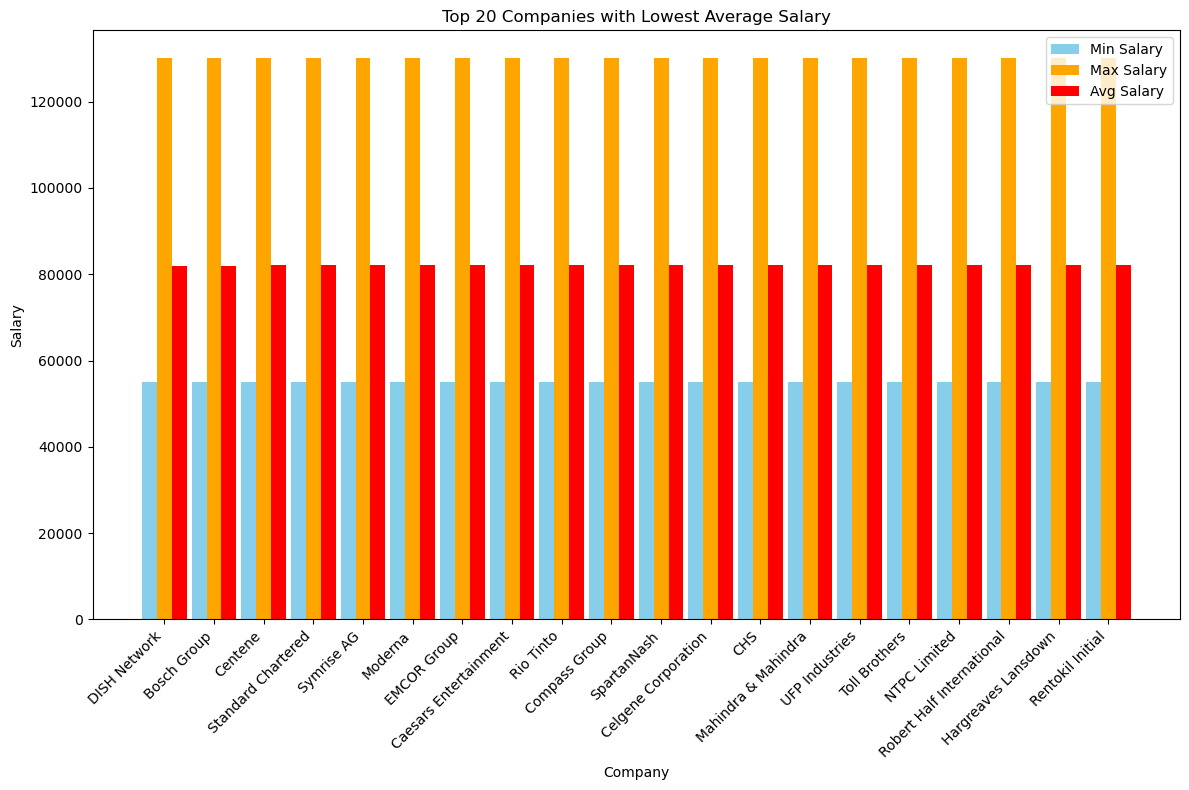

In [9]:
# Get the top 20 companies based on lowest average salary (ascending order)
bottom_20_companies = company_salary_stats.orderBy(col("Average Salary").asc()).limit(20)

bottom_20_companies.show()

# Convert the DataFrame to Pandas for plotting
bottom_20_companies_pd = bottom_20_companies.toPandas()

# Extract data for plotting
companies_bottom = bottom_20_companies_pd["Company"]
min_salaries_bottom = bottom_20_companies_pd["Min Salary"]
max_salaries_bottom = bottom_20_companies_pd["Max Salary"]
avg_salaries_bottom = bottom_20_companies_pd["Average Salary"]

# Set the width of the bars
bar_width = 0.3

# Set the x locations for the groups
index_bottom = np.arange(len(companies_bottom))

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(index_bottom, min_salaries_bottom, bar_width, color='skyblue', label='Min Salary')
plt.bar(index_bottom + bar_width, max_salaries_bottom, bar_width, color='orange', label='Max Salary')
plt.bar(index_bottom + 2*bar_width, avg_salaries_bottom, bar_width, color='red', label='Avg Salary')

# Add labels and title
plt.xlabel('Company')
plt.ylabel('Salary')
plt.title('Top 20 Companies with Lowest Average Salary')
plt.xticks(index_bottom + bar_width, companies_bottom, rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

The dataset sheds light on companies offering the lowest average salaries, with figures ranging from approximately $81,853 to $82,130 for last 20. Noteworthy among these are DISH Network, Bosch Group, and Centene, which appear to offer relatively lower average salaries compared to other companies in the dataset. Despite their significance in various industries, these companies demonstrate a trend towards lower average salaries, which may impact their competitiveness in attracting and retaining top talent. It's essential to recognize the diversity in sectors represented, including telecommunications, manufacturing, healthcare, and finance. These insights provide valuable context for job seekers evaluating potential employers and for companies assessing their compensation strategies in a competitive job market. Understanding these trends can inform strategic decisions regarding talent management and recruitment practices within respective industries.

### Country with Highest Average Salary

+--------------------+-----------------+----------+----------+
|             Country|   Average Salary|Min Salary|Max Salary|
+--------------------+-----------------+----------+----------+
|Bosnia and Herzeg...|82736.48286937902|     55000|    130000|
|         South Sudan|82709.97218911402|     55000|    130000|
|            Pakistan|82705.98684210527|     55000|    130000|
|      American Samoa|82699.62982548916|     55000|    130000|
|            Honduras|82671.89785875782|     55000|    130000|
|Central African R...|82667.77476255088|     55000|    130000|
|                Mali|82665.22318454363|     55000|    130000|
|               Italy|  82655.331373597|     55000|    130000|
|              Mexico|82651.50321648944|     55000|    130000|
|             Liberia|82647.33727810651|     55000|    130000|
|          Cabo Verde| 82642.6089280941|     55000|    130000|
|         Timor-Leste|82636.72885741522|     55000|    130000|
|             Hungary| 82628.2944148573|     55000|    

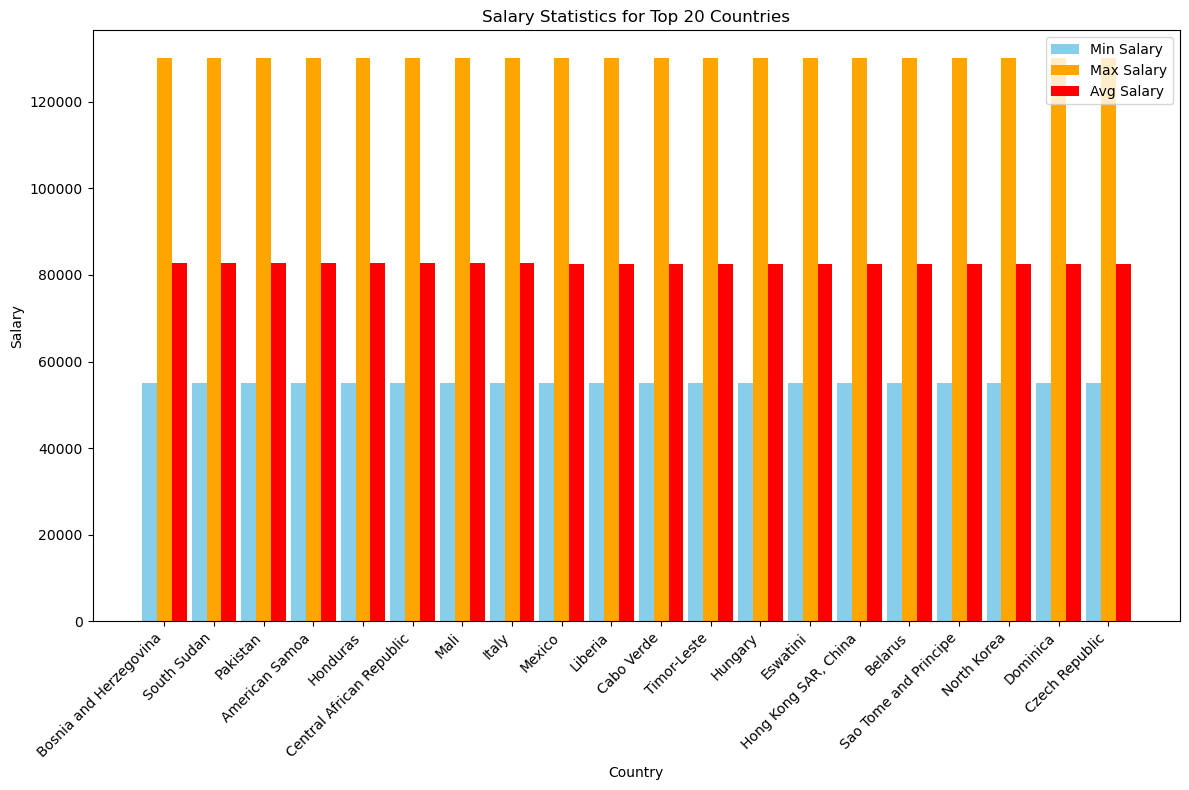

In [10]:
from pyspark.sql.functions import avg, col, min as min_, max as max_

# Calculate the average, minimum, and maximum salary for each country
country_salary_stats = df.withColumn("Average Salary", (col("Min Salary") + col("Max Salary")) / 2) \
    .groupBy("Country") \
    .agg(
        avg("Average Salary").alias("Average Salary"),
        min_("Min Salary").alias("Min Salary"),
        max_("Max Salary").alias("Max Salary")
    )

# Get the top 20 countries based on average salary
top_20_countries = country_salary_stats.orderBy(col("Average Salary").desc()).limit(20)

top_20_countries.show()

# Convert the DataFrame to Pandas for plotting
top_20_countries_pd = top_20_countries.toPandas()

# Extract data for plotting
countries = top_20_countries_pd["Country"]
min_salaries = top_20_countries_pd["Min Salary"]
max_salaries = top_20_countries_pd["Max Salary"]
avg_salaries = top_20_countries_pd["Average Salary"]

# Set the width of the bars
bar_width = 0.3

# Set the x locations for the groups
index = np.arange(len(countries))

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(index, min_salaries, bar_width, color='skyblue', label='Min Salary')
plt.bar(index + bar_width, max_salaries, bar_width, color='orange', label='Max Salary')
plt.bar(index + 2*bar_width, avg_salaries, bar_width, color='red', label='Avg Salary')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Salary')
plt.title('Salary Statistics for Top 20 Countries')
plt.xticks(index + bar_width, countries, rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


Analyzing the top 20 countries with the highest average salaries unveils intriguing insights into global wage trends. These countries boast average salaries ranging from approximately 82,600 to 83,000 USD, indicating a relatively tight cluster of high-income nations. Notably, this list comprises a diverse mix of countries from various regions, including Bosnia and Herzegovina, South Sudan, Pakistan, and Italy, showcasing the global distribution of prosperity. Moreover, the consistency in minimum and maximum salary ranges, spanning from 55,000 to 130,000 USD across these nations, suggests a balanced and well-structured wage distribution within their economies. Additionally, the presence of both developed and developing countries in this list highlights the complex interplay of factors, such as economic policies, labor market dynamics, and industry composition, driving higher income levels. These insights underscore the significance of socioeconomic factors and policy frameworks in fostering prosperity and improving living standards across different parts of the world.

### Country with Lowest Average Salary

+--------------------+-----------------+----------+----------+
|             Country|   Average Salary|Min Salary|Max Salary|
+--------------------+-----------------+----------+----------+
|              Sweden|82208.95620246526|     55000|    130000|
|              Israel| 82254.9229738781|     55000|    130000|
|             Vanuatu| 82270.7215665236|     55000|    130000|
| Trinidad and Tobago|82299.94700582935|     55000|    130000|
|               Japan|82304.38584689896|     55000|    130000|
|              Turkey| 82319.6632996633|     55000|    130000|
|Democratic Republ...| 82328.8390010627|     55000|    130000|
|         Philippines| 82330.4400484457|     55000|    130000|
|              Guyana|82338.09969263665|     55000|    130000|
|           Indonesia|82344.76461038961|     55000|    130000|
|     Slovak Republic|82346.87790003978|     55000|    130000|
|               Palau|82355.17379145026|     55000|    130000|
|           Nicaragua|82356.19060190074|     55000|    

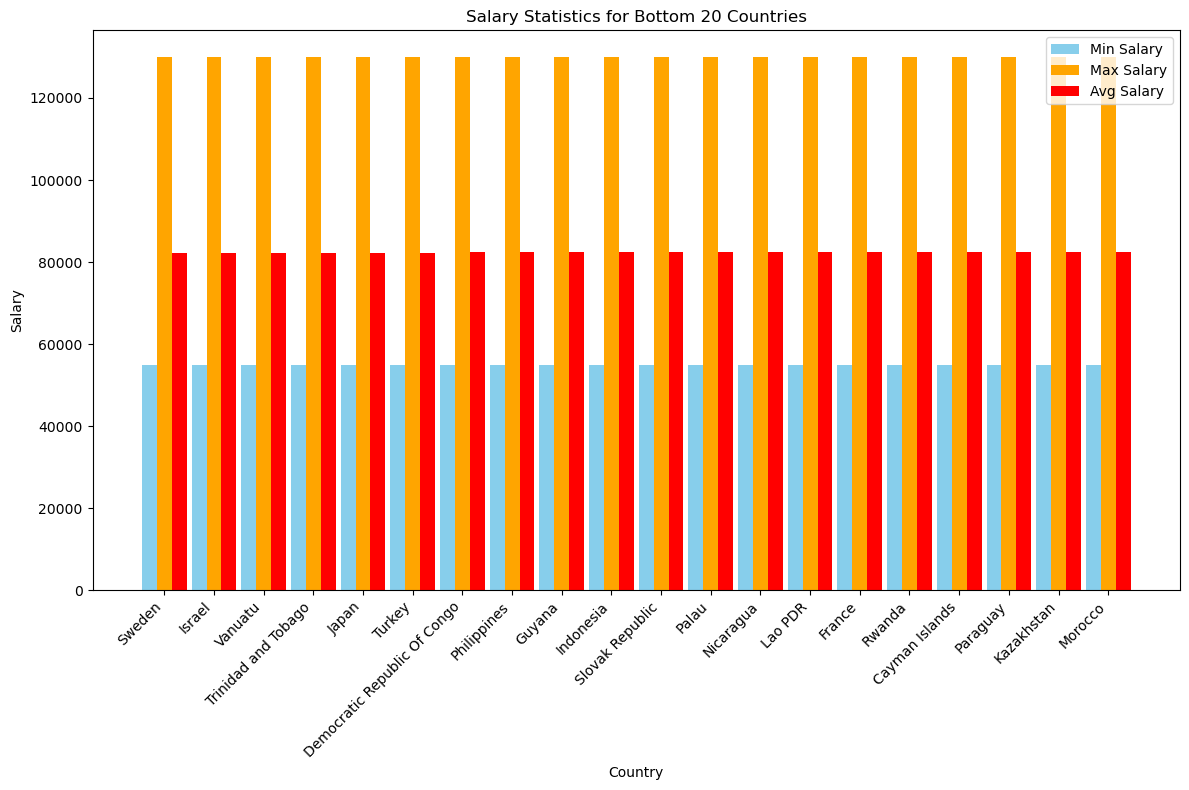

In [11]:
from pyspark.sql.functions import avg, col, min as min_, max as max_

# Get the top 20 countries based on average salary
bottom_20_countries = country_salary_stats.orderBy(col("Average Salary").asc()).limit(20)

bottom_20_countries.show()

# Convert the DataFrame to Pandas for plotting
bottom_20_countries_pd = bottom_20_countries.toPandas()

# Extract data for plotting
countries = bottom_20_countries_pd["Country"]
min_salaries = bottom_20_countries_pd["Min Salary"]
max_salaries = bottom_20_countries_pd["Max Salary"]
avg_salaries = bottom_20_countries_pd["Average Salary"]

# Set the width of the bars
bar_width = 0.3

# Set the x locations for the groups
index = np.arange(len(countries))

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(index, min_salaries, bar_width, color='skyblue', label='Min Salary')
plt.bar(index + bar_width, max_salaries, bar_width, color='orange', label='Max Salary')
plt.bar(index + 2*bar_width, avg_salaries, bar_width, color='red', label='Avg Salary')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Salary')
plt.title('Salary Statistics for Bottom 20 Countries')
plt.xticks(index + bar_width, countries, rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

An examination of countries with the lowest average salaries reveals significant global economic disparities. Among the 20 nations with the lowest average salaries, ranging from approximately $82,300 to $82,400 USD, gaps exist compared to countries with higher incomes. Factors such as economic development, labor market conditions, and social welfare policies contribute to this disparity. Notably, Sweden, Israel, and Vanuatu stand out as the three countries with the lowest salaries. The consistent salary range of $55,000 to $130,000 USD across these nations underscores the pervasive income inequality and highlights the need for targeted interventions to uplift marginalized communities and enhance overall prosperity. Addressing these socioeconomic disparities and fostering inclusive growth are essential for achieving a more equitable distribution of wealth and opportunities globally.